# Exploratory Data Analysis

### Analysis of biases and political opinion data

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pmdarima as pm
import statsmodels.api as sm

sns.set_style("darkgrid")

from scipy.stats import pearsonr


%matplotlib inline

In [59]:
df = pd.read_csv(r"C:\Users\14802\Desktop\hate-crime analysis\datasets\bias_total_pc_by_year.csv")

In [60]:
df = df.transpose().copy()

In [61]:
df.columns = ['anti_american_indian_or_alaska_native',
 'anti_arab',
 'anti_asian',
 'anti_atheism_agnosticism',
 'anti_bisexual',
 'anti_black_or_african_american',
 'anti_buddhist',
 'anti_catholic',
 'anti_eastern_orthodox_russian_greek_other',
 'anti_female',
 'anti_gay_male',
 'anti_gender_non_conforming',
 'anti_heterosexual',
 'anti_hindu',
 'anti_hispanic_or_latino',
 'anti_islamic_muslim',
 'anti_jehovahs_witness',
 'anti_jewish',
 'anti_lesbian_female',
 'anti_male',
 'anti_mental_disability',
 'anti_mormon',
 'anti_native_hawaiian_or_other_pacific_islander',
 'anti_physical_disability',
 'anti_protestant',
 'anti_sikh',
 'anti_transgender',
 'anti_white',
 'anti_lgbtq_grouped']

In [62]:
df = df[1:].copy()

In [63]:
df.reset_index(inplace=True)

In [64]:
df.rename(columns={'index':'year'}, inplace=True)

In [65]:
df.head()

,year,anti_american_indian_or_alaska_native,anti_arab,anti_asian,anti_atheism_agnosticism,anti_bisexual,anti_black_or_african_american,anti_buddhist,anti_catholic,anti_eastern_orthodox_russian_greek_other,...,anti_male,anti_mental_disability,anti_mormon,anti_native_hawaiian_or_other_pacific_islander,anti_physical_disability,anti_protestant,anti_sikh,anti_transgender,anti_white,anti_lgbtq_grouped
0,2000,0.021,0.013526,0.099662,0.001424,0.007475,1.04681,0.0,0.019932,0.0,...,0.0,0.006407,0.0,0.0,0.007119,0.021,0.0,0.0,0.322835,0.464497
1,2001,0.02749,0.089518,0.098681,0.001762,0.005286,1.030158,0.0,0.012688,0.0,...,0.0,0.008106,0.0,0.0,0.004934,0.011983,0.0,0.0,0.290051,0.489175
2,2002,0.022697,0.028284,0.07647,0.000698,0.005587,0.891455,0.0,0.017808,0.0,...,0.0,0.011174,0.0,0.0,0.007333,0.018507,0.0,0.0,0.281439,0.433681
3,2003,0.02458,0.004847,0.081701,0.003116,0.00277,0.891099,0.0,0.025964,0.0,...,0.0,0.003462,0.0,0.0,0.012463,0.016617,0.0,0.0,0.288378,0.427201
4,2004,0.029156,0.0,0.076836,0.002058,0.005145,0.948439,0.0,0.019552,0.0,...,0.0,0.010977,0.0,0.0,0.007889,0.013378,0.0,0.0,0.284017,0.398241


In [66]:
political_df = pd.read_csv(r"C:\Users\14802\Desktop\hate-crime analysis\datasets\clean_pew_research.csv")

In [67]:
political_df.head()

,year,percent_favor_gay_marriage,percent_accepting_homosexuality,percent_satisfied_with_current_us,percent_favor_immigrants,percent_agree_islam_encourages_violence,percent_agree_discrimination_hurts_black_people
0,2000,35.0,50.0,50.0,50.0,25.0,31
1,2001,35.0,50.0,48.2,50.0,25.0,31
2,2002,35.0,50.0,44.6,50.0,25.0,31
3,2003,32.6,47.0,43.2,46.0,44.0,24
4,2004,31.0,49.0,38.3,45.0,46.0,27


In [68]:
political_df.year = political_df.year.astype(str)

In [69]:
df = df.merge(political_df, on='year')

In [70]:
df.head()

,year,anti_american_indian_or_alaska_native,anti_arab,anti_asian,anti_atheism_agnosticism,anti_bisexual,anti_black_or_african_american,anti_buddhist,anti_catholic,anti_eastern_orthodox_russian_greek_other,...,anti_sikh,anti_transgender,anti_white,anti_lgbtq_grouped,percent_favor_gay_marriage,percent_accepting_homosexuality,percent_satisfied_with_current_us,percent_favor_immigrants,percent_agree_islam_encourages_violence,percent_agree_discrimination_hurts_black_people
0,2000,0.021,0.013526,0.099662,0.001424,0.007475,1.04681,0.0,0.019932,0.0,...,0.0,0.0,0.322835,0.464497,35.0,50.0,50.0,50.0,25.0,31
1,2001,0.02749,0.089518,0.098681,0.001762,0.005286,1.030158,0.0,0.012688,0.0,...,0.0,0.0,0.290051,0.489175,35.0,50.0,48.2,50.0,25.0,31
2,2002,0.022697,0.028284,0.07647,0.000698,0.005587,0.891455,0.0,0.017808,0.0,...,0.0,0.0,0.281439,0.433681,35.0,50.0,44.6,50.0,25.0,31
3,2003,0.02458,0.004847,0.081701,0.003116,0.00277,0.891099,0.0,0.025964,0.0,...,0.0,0.0,0.288378,0.427201,32.6,47.0,43.2,46.0,44.0,24
4,2004,0.029156,0.0,0.076836,0.002058,0.005145,0.948439,0.0,0.019552,0.0,...,0.0,0.0,0.284017,0.398241,31.0,49.0,38.3,45.0,46.0,27


In [71]:
us_data = pd.read_csv(r"C:\Users\14802\Desktop\hate-crime analysis\datasets\us_per_cap_totals.csv")

In [72]:
us_data = us_data[['year', 'total_incidents_per_capita']].copy()

In [73]:
us_data.year = us_data.year.astype(str)

In [74]:
df = df.merge(us_data, on='year')

In [75]:
df.rename(columns={"total_incidents_per_capita":"us_total_crimes_per_capita"}, inplace=True)

In [76]:
df.year = df.year.astype(int)

In [77]:
df.anti_gay_male = df.anti_gay_male.astype(float)

In [78]:
df.anti_lesbian_female = df.anti_lesbian_female.astype(float)

## Exploratory Data Analysis

In [79]:
df = df[['year', 'anti_black_or_african_american', 'anti_arab', 'anti_islamic_muslim', 'anti_gay_male', 'anti_lesbian_female', 'anti_hispanic_or_latino','us_total_crimes_per_capita', 'percent_favor_gay_marriage', 'percent_accepting_homosexuality', 'percent_satisfied_with_current_us', 'percent_favor_immigrants', 'percent_agree_islam_encourages_violence', 'percent_agree_discrimination_hurts_black_people']].copy()

## Exploratory Question: 

### Is there a relationship between the percentage of people who believe homomsexuality should be accepted  by society and the amount of anti-gay or anti-lesbian hate crimes per capita?

In [80]:
pearsonr(df['anti_gay_male'], df['percent_accepting_homosexuality'])

(-0.5055942779471554, 0.01937866776998955)

The coefficient of -0.5055942779471553 and p-value of 0.01937866776998959 show a **moderate negative relationship which is statistically significant** (generally, the lower the p-value, the higher the statistical significance. Anything below .05 is typically considered statistically significant). 

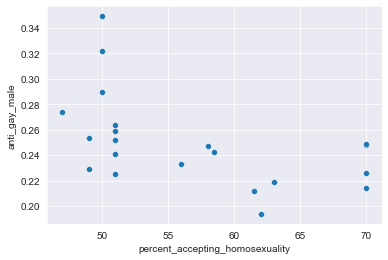

In [81]:
sns.scatterplot(x=df['percent_accepting_homosexuality'], y=df['anti_gay_male']);

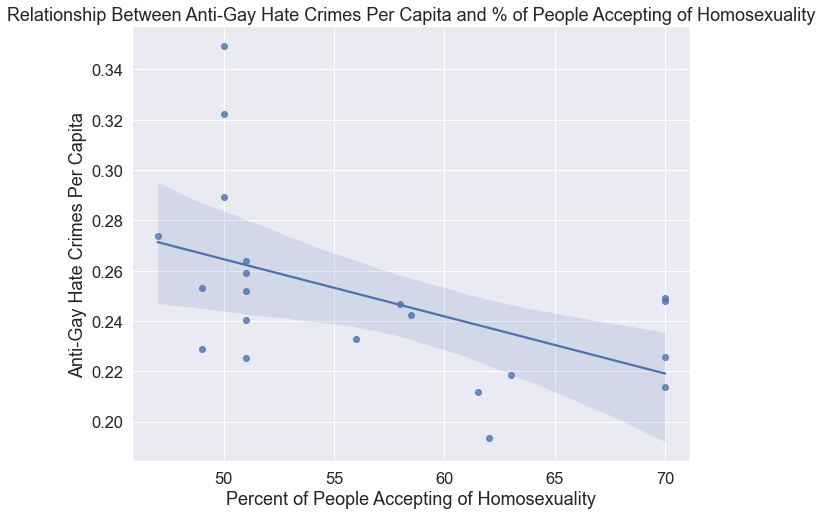

In [82]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
fig1 = sns.regplot(x=df['percent_accepting_homosexuality'], y=df['anti_gay_male'])
fig1.set(title="Relationship Between Anti-Gay Hate Crimes Per Capita and % of People Accepting of Homosexuality")
fig1.set_xlabel("Percent of People Accepting of Homosexuality")
fig1.set_ylabel("Anti-Gay Hate Crimes Per Capita");

#### Linear Regression:

In [83]:
X = df['percent_accepting_homosexuality']
y = df['anti_gay_male']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          anti_gay_male   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                              325.7
Date:                Wed, 23 Mar 2022   Prob (F-statistic):                    7.60e-14
Time:                        09:06:08   Log-Likelihood:                          29.067
No. Observations:                  21   AIC:                                     -56.13
Df Residuals:                      20   BIC:                                     -55.09
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
percent_accepting_homosexuality     0.0043      0.000     18.048      0.000       0.004       0.005
==============================================================================
Omnibus:                        0.724   Durbin-Watson:                   0.190
Prob(Omnibus):                  0.696   Jarque-Bera (JB):                0.751
Skew:                           0.276   Prob(JB):                        0.687
Kurtosis:                       2.255   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
pearsonr(df['anti_lesbian_female'], df['percent_accepting_homosexuality'])

(-0.8017499838057308, 1.243257264362822e-05)

The coefficient of -0.8017499838057306 and p-value of 1.243257264362834e-05 show a **strong negative relationship with a high statistical significance** (generally, the lower the p-value, the higher the statistical significance. Anything below .05 is typically considered statistically significant). 

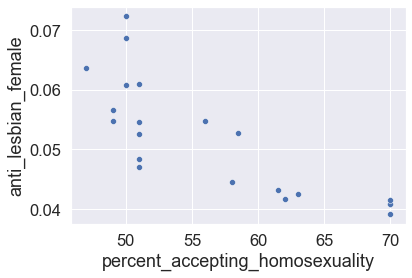

In [85]:
sns.scatterplot(x=df['percent_accepting_homosexuality'], y=df['anti_lesbian_female']);

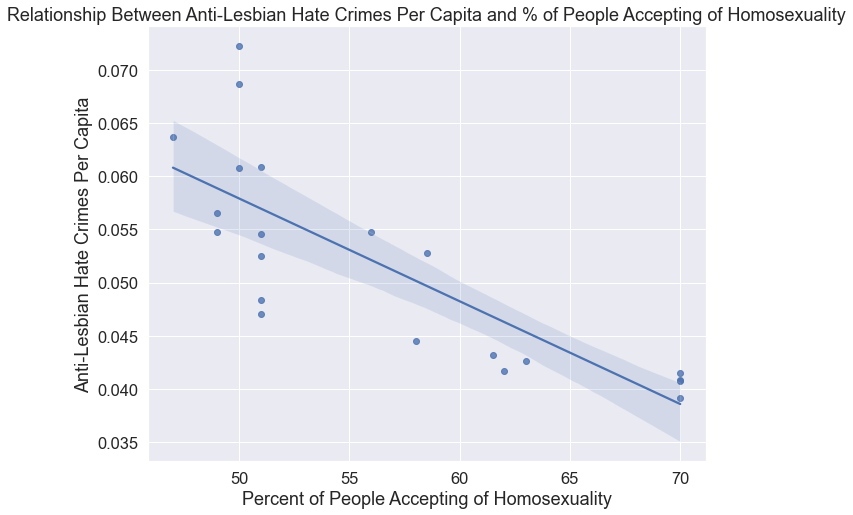

In [86]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
fig2 = sns.regplot(x=df['percent_accepting_homosexuality'], y=df['anti_lesbian_female'])
fig2.set(title="Relationship Between Anti-Lesbian Hate Crimes Per Capita and % of People Accepting of Homosexuality")
fig2.set_xlabel("Percent of People Accepting of Homosexuality")
fig2.set_ylabel("Anti-Lesbian Hate Crimes Per Capita");

#### Linear Regression

In [87]:
X = df['percent_accepting_homosexuality']
y = df['anti_lesbian_female']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     anti_lesbian_female   R-squared (uncentered):                   0.909
Model:                             OLS   Adj. R-squared (uncentered):              0.905
Method:                  Least Squares   F-statistic:                              200.8
Date:                 Wed, 23 Mar 2022   Prob (F-statistic):                    6.85e-12
Time:                         09:06:10   Log-Likelihood:                          57.346
No. Observations:                   21   AIC:                                     -112.7
Df Residuals:                       20   BIC:                                     -111.6
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
percent_accepting_homosexuality     0.0009   6.17e-05     14.169      0.000       0.001       0.001
==============================================================================
Omnibus:                        3.138   Durbin-Watson:                   0.210
Prob(Omnibus):                  0.208   Jarque-Bera (JB):                1.286
Skew:                          -0.076   Prob(JB):                        0.526
Kurtosis:                       1.797   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Exploratory Question: 

### Is there a relationship between the percentage of people who support gay and lesbian marriage and the amount of anti-gay or anti-lesbian hate crimes per capita?

In [88]:
pearsonr(df['anti_gay_male'], df['percent_favor_gay_marriage'])

(-0.5542383764685135, 0.009129605621183293)

The coefficient of -0.5542383764685134 and p-value of 0.009129605621183317 show a **moderate negative relationship which is statistically significant** (generally, the lower the p-value, the higher the statistical significance. Anything below .05 is typically considered statistically significant). 

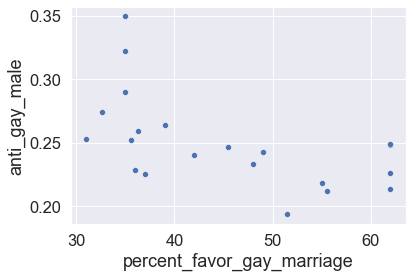

In [89]:
sns.scatterplot(data=df, x=df['percent_favor_gay_marriage'], y=df['anti_gay_male']);

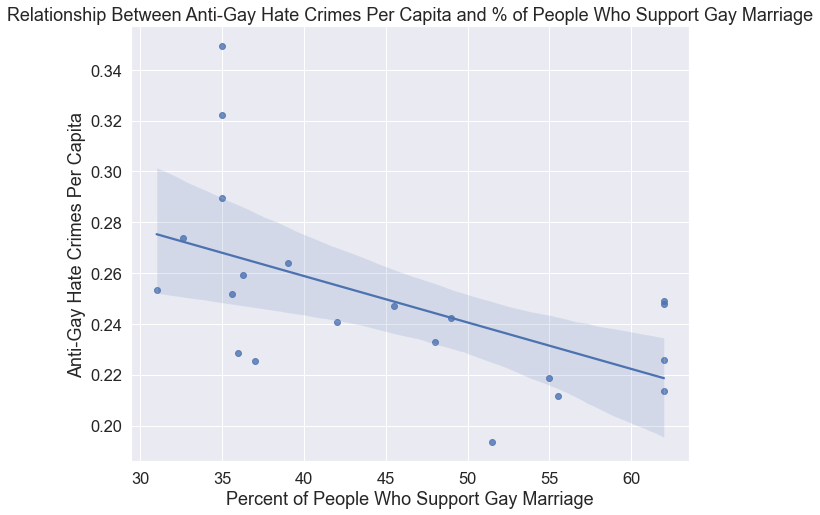

In [90]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
fig3 = sns.regplot(data=df, x=df['percent_favor_gay_marriage'], y=df['anti_gay_male'])
fig3.set(title="Relationship Between Anti-Gay Hate Crimes Per Capita and % of People Who Support Gay Marriage")
fig3.set_xlabel("Percent of People Who Support Gay Marriage")
fig3.set_ylabel("Anti-Gay Hate Crimes Per Capita");

#### Linear Regression

In [91]:
X = df['percent_favor_gay_marriage']
y = df['anti_gay_male']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          anti_gay_male   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                              166.2
Date:                Wed, 23 Mar 2022   Prob (F-statistic):                    3.79e-11
Time:                        09:06:12   Log-Likelihood:                          22.571
No. Observations:                  21   AIC:                                     -43.14
Df Residuals:                      20   BIC:                                     -42.10
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
percent_favor_gay_marriage     0.0051      0.000     12.892      0.000       0.004       0.006
==============================================================================
Omnibus:                        2.782   Durbin-Watson:                   0.109
Prob(Omnibus):                  0.249   Jarque-Bera (JB):                1.231
Skew:                           0.102   Prob(JB):                        0.540
Kurtosis:                       1.832   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
pearsonr(df['anti_lesbian_female'], df['percent_favor_gay_marriage'])

(-0.8174220397019578, 6.0704623900791585e-06)

The coefficient of -0.8174220397019577 and p-value 6.0704623900791915e-06 show a **strong negative relationship with a high statistical significance** (generally, the lower the p-value, the higher the statistical significance. Anything below .05 is typically considered statistically significant). 

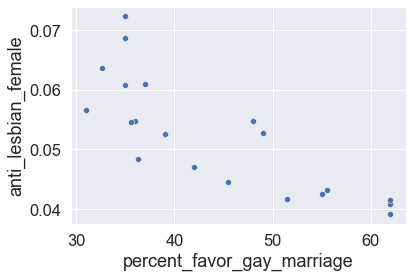

In [93]:
sns.scatterplot(data=df, x=df['percent_favor_gay_marriage'], y=df['anti_lesbian_female']);

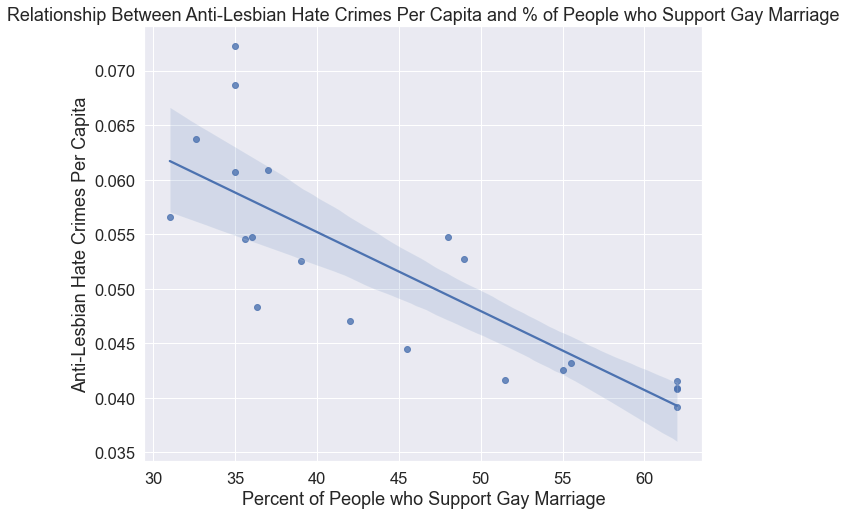

In [94]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
fig4 = sns.regplot(data=df, x=df['percent_favor_gay_marriage'], y=df['anti_lesbian_female'])
fig4.set(title="Relationship Between Anti-Lesbian Hate Crimes Per Capita and % of People who Support Gay Marriage")
fig4.set_xlabel("Percent of People who Support Gay Marriage")
fig4.set_ylabel("Anti-Lesbian Hate Crimes Per Capita");

#### Linear Regression

In [95]:
X = df['percent_accepting_homosexuality']
y = df['anti_lesbian_female']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     anti_lesbian_female   R-squared (uncentered):                   0.909
Model:                             OLS   Adj. R-squared (uncentered):              0.905
Method:                  Least Squares   F-statistic:                              200.8
Date:                 Wed, 23 Mar 2022   Prob (F-statistic):                    6.85e-12
Time:                         09:06:15   Log-Likelihood:                          57.346
No. Observations:                   21   AIC:                                     -112.7
Df Residuals:                       20   BIC:                                     -111.6
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
percent_accepting_homosexuality     0.0009   6.17e-05     14.169      0.000       0.001       0.001
==============================================================================
Omnibus:                        3.138   Durbin-Watson:                   0.210
Prob(Omnibus):                  0.208   Jarque-Bera (JB):                1.286
Skew:                          -0.076   Prob(JB):                        0.526
Kurtosis:                       1.797   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Exploratory Question: 

### Is there a relationship between the percentage of people who agree Islamic beliefs encourage violence and the amount of anti-islamic hate crimes per capita?

In [96]:
pearsonr(df['anti_islamic_muslim'], df['percent_agree_islam_encourages_violence'])

(-0.20605504950694012, 0.3701921047027624)

Because the p-value here is well above .05, these results suggest no statistically significant relationship between the amount of anti-islamic hate crimes and the percentage of people who think Islam encourages violence among its members. 

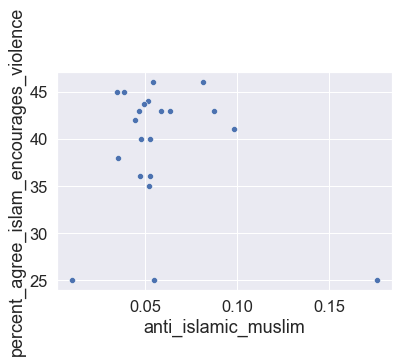

In [97]:
sns.scatterplot(data=df, x=df['anti_islamic_muslim'], y=df['percent_agree_islam_encourages_violence']);

As expected by the pearsonr calculation results, there does not appear to be any relationship between the amount of anti-islamic hate crimes and the percentage of people who think Islam encourages violence among its members. 

## Exploratory Question: 

### Is there a relationship between the percentage of people who agree racial discrimination makes it hard for many black people to "get ahead" and the amount of anti-black hate crimes per capita?

In [98]:
pearsonr(df['anti_black_or_african_american'], df['percent_agree_discrimination_hurts_black_people'])

(0.035836716210967554, 0.8774383232202404)

Based on the coeffiecient of 0.0358 and p-value of 0.878, there is no observed relationship between the amount of anti-black hate crimes and the percent of people who agree that racial discrimination hurts black peoples' ability to get ahead. (For correlation, the closer the value is to -1 or 1, the higher the correlation. For p-value, the results are not considered statistically significant unless the p-value is under 0.05). 

<AxesSubplot:xlabel='anti_black_or_african_american', ylabel='percent_agree_discrimination_hurts_black_people'>

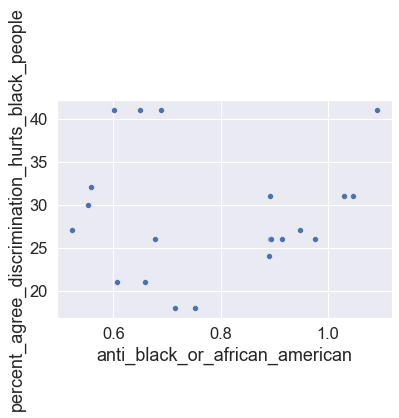

In [99]:
sns.scatterplot(data=df, x=df['anti_black_or_african_american'], y=df['percent_agree_discrimination_hurts_black_people'])

As expected by the pearsonr calculation above, there is no apparent relationship between the amount of anti-black hate crimes and the percent of people who agree that racial discrimination hurts black peoples' ability to get ahead.

## Exploratory Question: 

### Is there a relationship between the total amount of hate crimes per capita across the U.S. and the percentage of people who said they were satisfied with the way things were going in the U.S. each year?

In [100]:
pearsonr(df['us_total_crimes_per_capita'], df['percent_satisfied_with_current_us'])

(0.6345704446811915, 0.0020021476662400216)

<AxesSubplot:xlabel='us_total_crimes_per_capita', ylabel='percent_satisfied_with_current_us'>

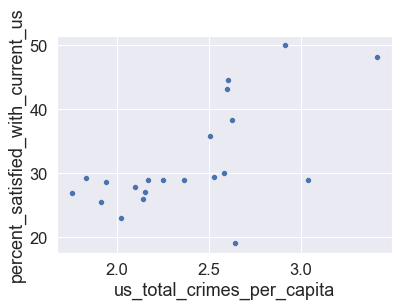

In [101]:
sns.scatterplot(data=df, x=df['us_total_crimes_per_capita'], y=df['percent_satisfied_with_current_us'])

These results are defeinitely surprising. It is important to remember that correlation does not equal causation. Going into this, I thought there might be a correlation between a larger percentage of people being unhappy with the current U.S. situation and a smaller amount of hate crimes, but it seems that hypothesis is not correct.

This pearsonr correlation shows a moderately strong correlation between the percentage of people satisfied with the current situation in the U.S. and the amount of hate crimes per capita across the U.S. (correlation of 0.63457 and p-value of 0.002).

Again, just because there is a correlation does not mean there is any causation. Common sense tells me this is most likely pure coincidental correlation. 

## Time Series Analysis

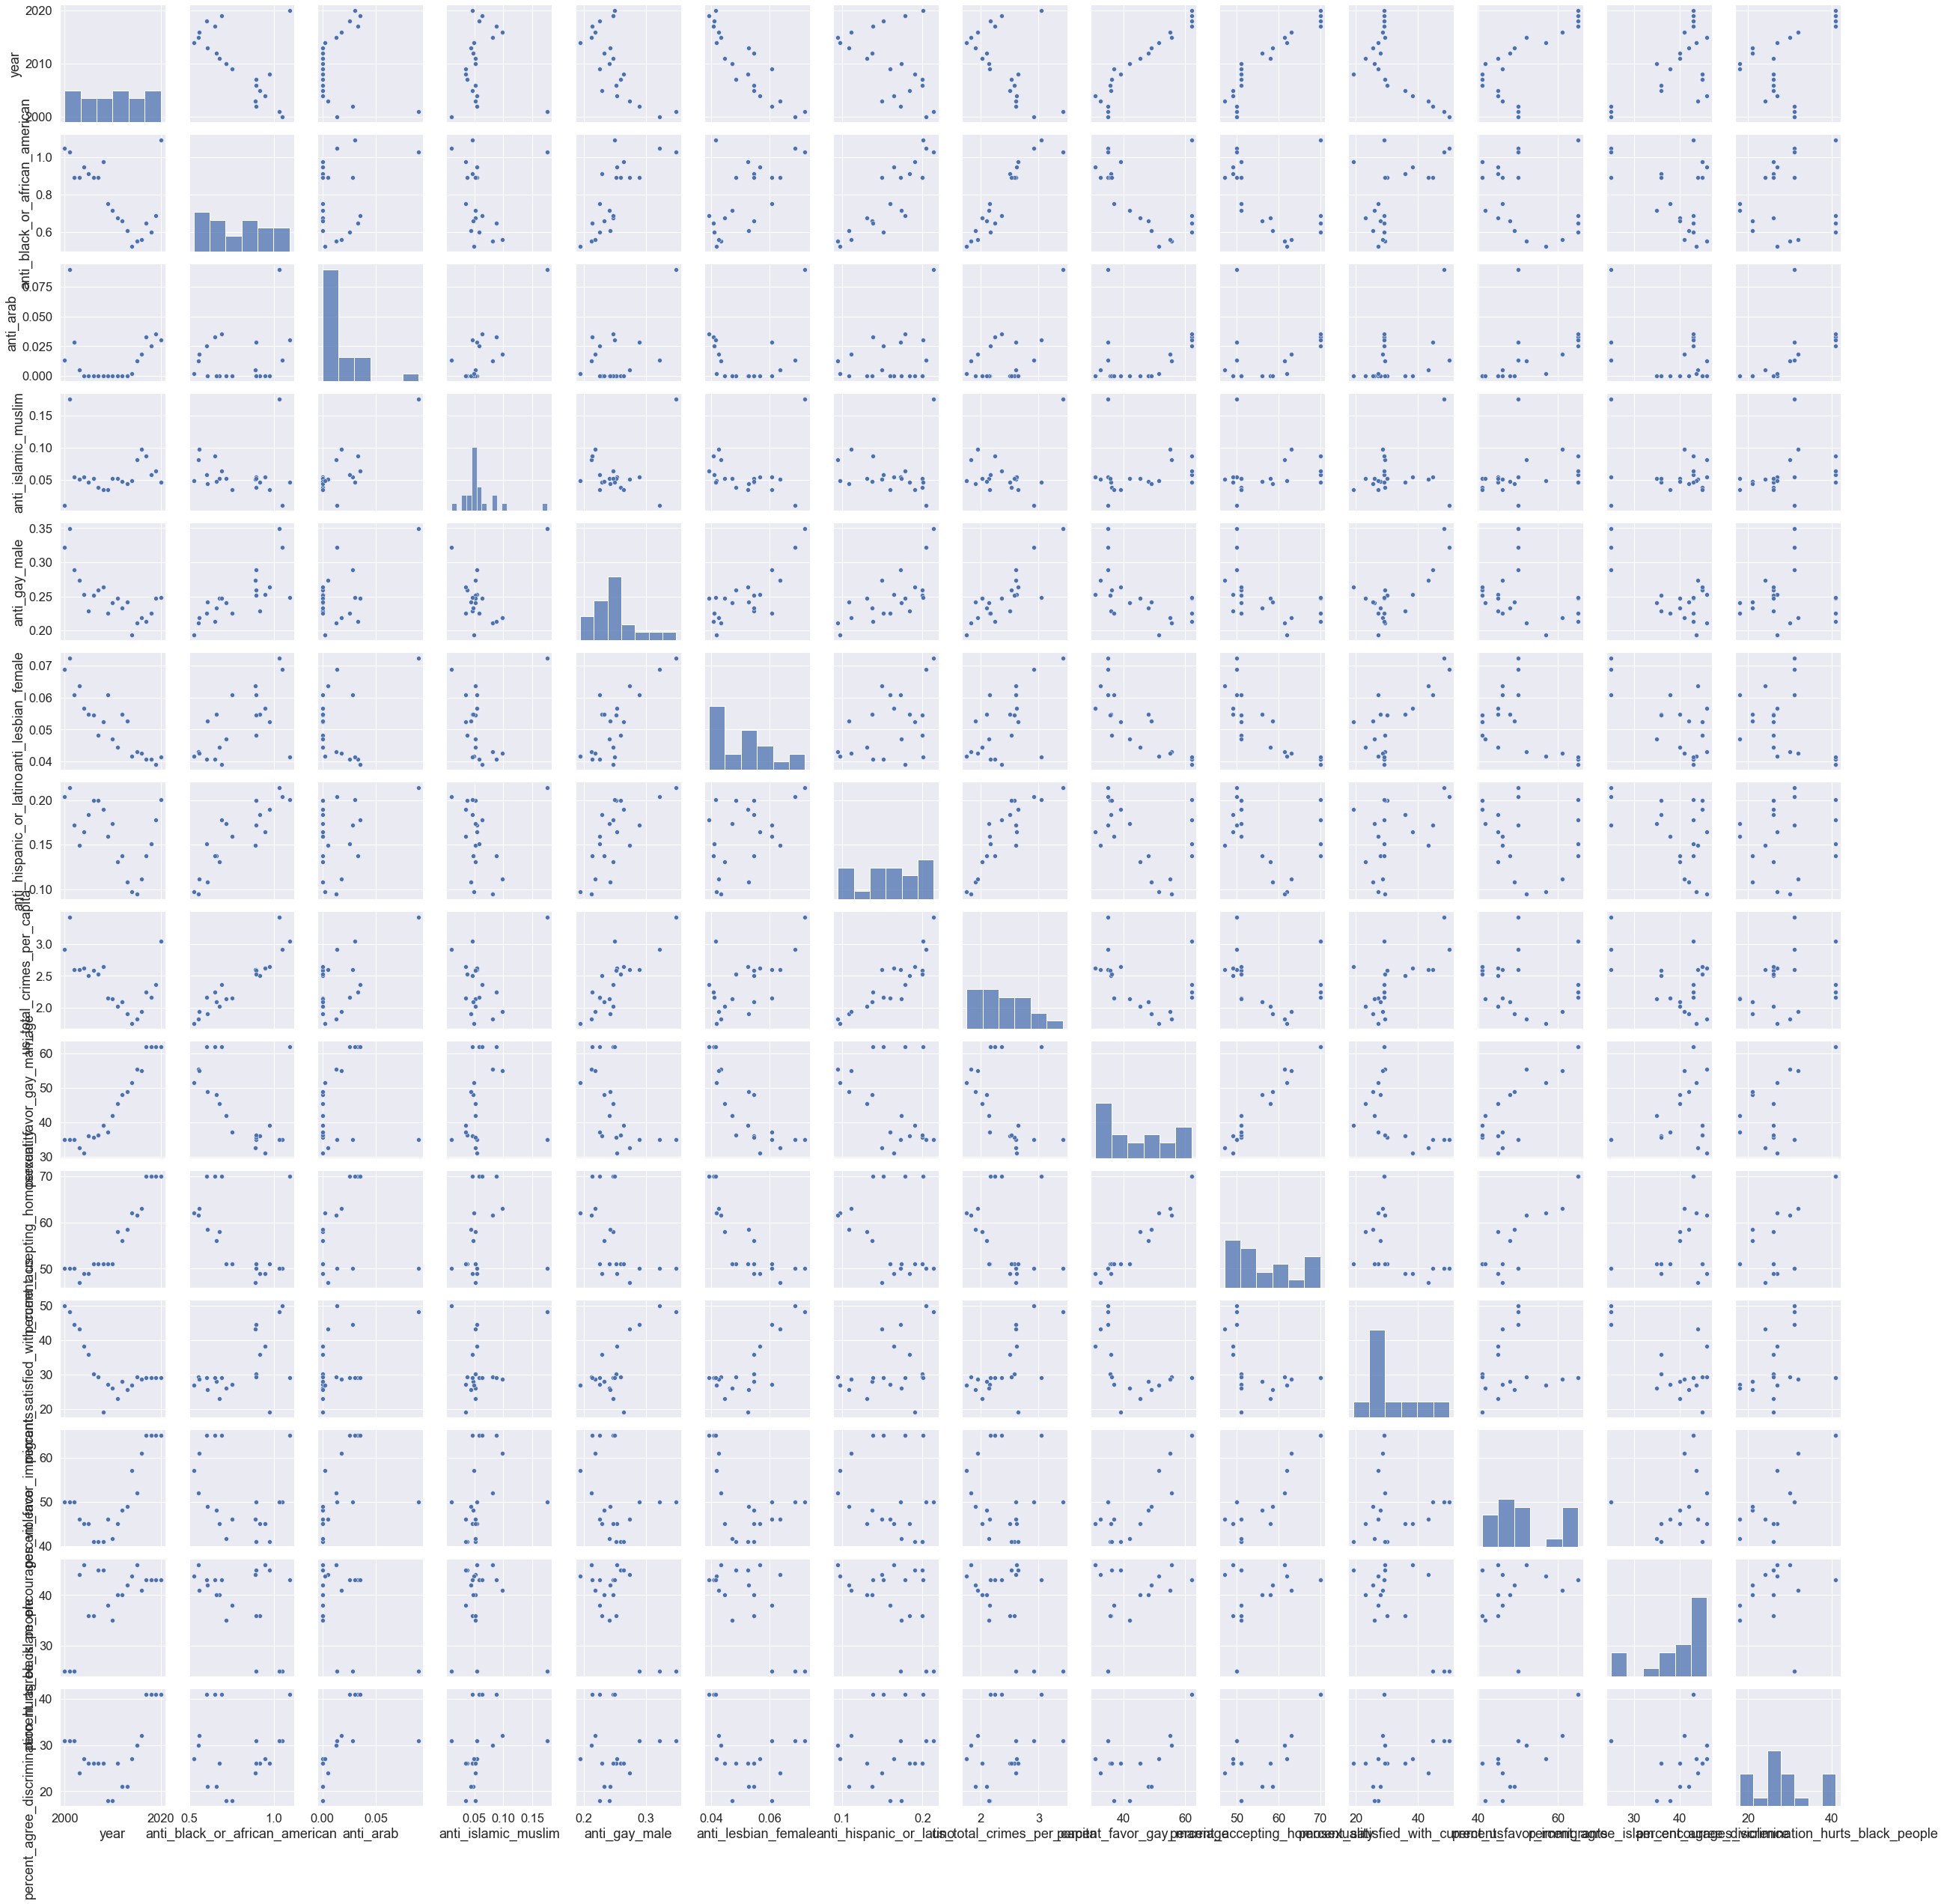

In [102]:
sns.pairplot(df)

In [103]:
full_df = df.copy()

In [104]:
full_df.index = pd.period_range('2000','2020', freq='Y')
full_df

,year,anti_black_or_african_american,anti_arab,anti_islamic_muslim,anti_gay_male,anti_lesbian_female,anti_hispanic_or_latino,us_total_crimes_per_capita,percent_favor_gay_marriage,percent_accepting_homosexuality,percent_satisfied_with_current_us,percent_favor_immigrants,percent_agree_islam_encourages_violence,percent_agree_discrimination_hurts_black_people
2000,2000,1.04681,0.013526,0.010322,0.322123,0.068696,0.203952,2.912861,35.0,50.0,50.0,50.0,25.0,31
2001,2001,1.030158,0.089518,0.175863,0.349260,0.072248,0.213926,3.414407,35.0,50.0,48.2,50.0,25.0,31
2002,2002,0.891455,0.028284,0.054472,0.289470,0.060757,0.172146,2.602345,35.0,50.0,44.6,50.0,25.0,31
2003,2003,0.891099,0.004847,0.051583,0.273838,0.063699,0.149555,2.600756,32.6,47.0,43.2,46.0,44.0,24
2004,2004,0.948439,0.0,0.054197,0.253146,0.056598,0.163962,2.624611,31.0,49.0,38.3,45.0,46.0,27
2005,2005,0.91393,0.0,0.046903,0.228737,0.054720,0.183874,2.507812,36.0,49.0,35.8,45.0,36.0,26
2006,2006,0.891372,0.0,0.052513,0.251792,0.054533,0.19928,2.584289,35.6,51.0,30.1,41.0,36.0,26
2007,2007,0.893252,0.0,0.038344,0.259073,0.048347,0.199389,2.531278,36.3,51.0,29.4,41.0,45.0,26
2008,2008,0.975354,0.0,0.034681,0.263904,0.052517,0.189918,2.643591,39.0,51.0,19.1,41.0,45.0,26
2009,2009,0.753049,0.0,0.035033,0.225260,0.060899,0.159123,2.155676,37.0,51.0,27.1,46.0,38.0,18


In [105]:
full_df.drop(columns='year', inplace=True)

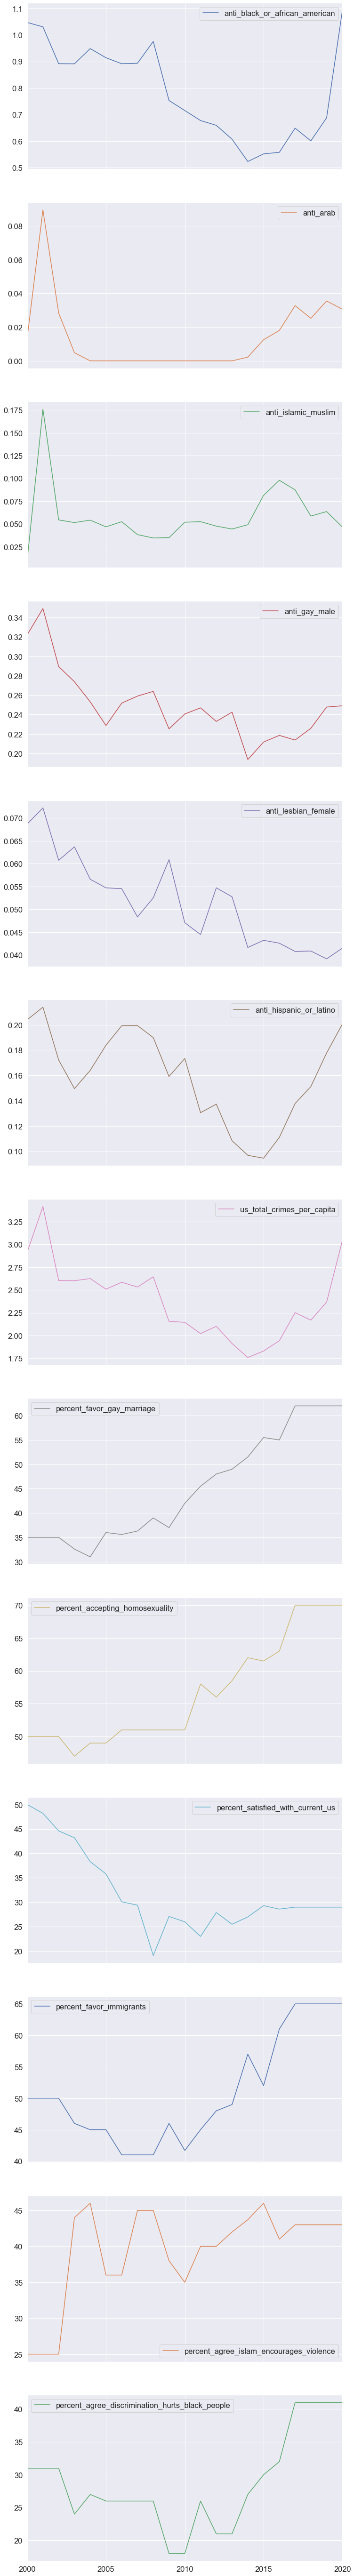

In [106]:
full_df.plot.line(subplots=True, figsize=(12,100));

In [107]:
predictors = df[[ 'percent_favor_gay_marriage',
 'percent_accepting_homosexuality',
 'percent_satisfied_with_current_us',
 'percent_favor_immigrants',
 'percent_agree_islam_encourages_violence',
 'percent_agree_discrimination_hurts_black_people']]

In [112]:
anti_gay = full_df['anti_gay_male']

anti_lesbian = full_df['anti_lesbian_female']

In [113]:
anti_lgbtq_auto = pm.auto_arima(y=anti_lgbtq, exogenous=predictors, suppress_warnings=False,
stationary=True, maxiter=10000)
anti_lgbtq_auto.summary()

C:\Users\14802\anaconda3\envs\tsa\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\14802\anaconda3\envs\tsa\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   21
Model:                        SARIMAX   Log Likelihood                  44.039
Date:                Wed, 23 Mar 2022   AIC                            -74.078
Time:                        09:08:50   BIC                            -66.766
Sample:                             0   HQIC                           -72.491
                                 - 21                                         
Covariance Type:                  opg                                         
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
percent_favor_gay_marriage                         -0.0052      0.003     -1.687      0.092      -0.011       0.001
percent_accepting_homosexuality                     0.0150      0.005      3.234      0.001       0.006       0.024
percent_satisfied_with_current_us                   0.0045      0.002      3.004      0.003       0.002       0.007
percent_favor_immigrants                           -0.0059      0.003     -1.714      0.086      -0.013       0.001
percent_agree_islam_encourages_violence            -0.0008      0.002     -0.473      0.636      -0.004       0.002
percent_agree_discrimination_hurts_black_people    -0.0005      0.002     -0.226      0.821      -0.005       0.004
sigma2                                              0.0009      0.000      1.997      0.046    1.65e-05       0.002
===================================================================================
Ljung-Box (L1) (Q):                   1.79   Jarque-Bera (JB):                 0.55
Prob(Q):                              0.18   Prob(JB):                         0.76
Heteroskedasticity (H):               1.15   Skew:                             0.39
Prob(H) (two-sided):                  0.85   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [118]:
anti_gay_auto = pm.auto_arima(y=anti_gay, exogenous=predictors, suppress_warnings=False,
stationary=True, maxiter=10000)
anti_gay_auto.summary()

C:\Users\14802\anaconda3\envs\tsa\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\14802\anaconda3\envs\tsa\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\14802\anaconda3\envs\tsa\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\14802\anaconda3\envs\tsa\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   21
Model:                        SARIMAX   Log Likelihood                  50.814
Date:                Wed, 23 Mar 2022   AIC                            -87.628
Time:                        09:59:27   BIC                            -80.317
Sample:                             0   HQIC                           -86.041
                                 - 21                                         
Covariance Type:                  opg                                         
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
percent_favor_gay_marriage                         -0.0035      0.003     -1.324      0.186      -0.009       0.002
percent_accepting_homosexuality                     0.0100      0.004      2.580      0.010       0.002       0.018
percent_satisfied_with_current_us                   0.0045      0.001      3.733      0.000       0.002       0.007
percent_favor_immigrants                           -0.0056      0.003     -2.000      0.045      -0.011      -0.000
percent_agree_islam_encourages_violence            -0.0010      0.001     -0.755      0.450      -0.004       0.002
percent_agree_discrimination_hurts_black_people     0.0006      0.002      0.279      0.780      -0.003       0.005
sigma2                                              0.0005      0.000      2.201      0.028    5.06e-05       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):                 2.86
Prob(Q):                              0.55   Prob(JB):                         0.24
Heteroskedasticity (H):               0.72   Skew:                             0.82
Prob(H) (two-sided):                  0.68   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [111]:
anti_lesbian_auto = pm.auto_arima(y=anti_lesbian, exogenous=predictors, suppress_warnings=False,
stationary=True, maxiter=10000)
anti_gay_auto.summary()

C:\Users\14802\anaconda3\envs\tsa\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\14802\anaconda3\envs\tsa\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\14802\anaconda3\envs\tsa\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\14802\anaconda3\envs\tsa\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\14802\anaconda3\envs\tsa\lib\site-packages\statsmodels\

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   21
Model:                        SARIMAX   Log Likelihood                  50.814
Date:                Wed, 23 Mar 2022   AIC                            -87.628
Time:                        09:07:11   BIC                            -80.317
Sample:                             0   HQIC                           -86.041
                                 - 21                                         
Covariance Type:                  opg                                         
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
percent_favor_gay_marriage                         -0.0035      0.003     -1.324      0.186      -0.009       0.002
percent_accepting_homosexuality                     0.0100      0.004      2.580      0.010       0.002       0.018
percent_satisfied_with_current_us                   0.0045      0.001      3.733      0.000       0.002       0.007
percent_favor_immigrants                           -0.0056      0.003     -2.000      0.045      -0.011      -0.000
percent_agree_islam_encourages_violence            -0.0010      0.001     -0.755      0.450      -0.004       0.002
percent_agree_discrimination_hurts_black_people     0.0006      0.002      0.279      0.780      -0.003       0.005
sigma2                                              0.0005      0.000      2.201      0.028    5.06e-05       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):                 2.86
Prob(Q):                              0.55   Prob(JB):                         0.24
Heteroskedasticity (H):               0.72   Skew:                             0.82
Prob(H) (two-sided):                  0.68   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""